This notebook simulates the minimization of the Holevo information in Gaussian CVQKD, reproducing the results
in https://link.aps.org/doi/10.1103/PhysRevA.104.012411 and http://www.nature.com/articles/s41534-018-0084-0

## Minimization of Information Leakage in CVQKD
It was shown that, by preparing a squeezed state and modulating the squeezed quadrature up to the vacuum noise quadrature variance, the Holevo information is theoretically nullified for purely-lossy quantum channels, and minimized for thermal-lossy channels.

In [1]:
import numpy
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib widget
from matplotlib import font_manager
from ipywidgets import *
from Iaji.Physics.Theory.QuantumMechanics.QuanutmInformation.QuantumCommunications.QuantumKeyDistribution.ContinuousVariables.GaussianStatesQKD.Utilities import *

In [2]:
#%%
#Close all figures
plt.close('all')
#%%
#General plot settings
default_marker = ""
default_figure_size = (10, 7)
default_fontsize = 24
title_fontsize = default_fontsize
title_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=title_fontsize)
axis_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=title_fontsize*0.7)
legend_font = font_manager.FontProperties(family='Times New Roman',
                                   weight='normal',
                                   style='normal', size=int(numpy.floor(0.9*title_fontsize)))

In [3]:
#%%
#Colormaps for surface or contour plots
c1 = [(0.,'#ffffff'), (1/3.,'#FEFEFE'), (1,'#CC0000')]
c2 = [(0.,'#ffffff'), (0.1,'#0C50B7'), (0.2,'#2765C2'), (0.3,'#5889D3'), \
      (0.4,'#A2BEE8'), (0.49,'#FFFFFF'), (0.51,'#FFFFFF'), (0.6,'#E8A2A2'), \
      (0.7,'#D35858'), (0.8,'#C22727'), (0.9,'#B70C0C'), (1.,'#B20000')]
c3 = [(0.,'#ffffff'), (0.1,'#0C50B7'), (0.2,'#2765C2'), (0.3,'#5889D3'), \
      (0.4,'#A2BEE8'), (0.49,'#F9F9F9'), (0.51,'#F9F9F9'), (0.6,'#E8A2A2'), \
      (0.7,'#D35858'), (0.8,'#C22727'), (0.9,'#B70C0C'), (1.,'#B20000')]
cmwig1 = matplotlib.colors.LinearSegmentedColormap.from_list('cmwig1',c2)
cmwig2 = matplotlib.colors.LinearSegmentedColormap.from_list('cmwig2',c3)

## Secret Key Fraction VS Loss with Minimization of Information Leakage
Following is an interactive plot comparing the performance of the coherent states protocol with the
squeezed states protocol based on modulation of the squeezed quadrature, under the condition:

\begin{equation}
    V_{p_A} = V_{p_S} + V_\text{sqz} = 1
\end{equation}

for the squeezed states protocol, and 

\begin{equation}
    V_{q_S} = V_{p_S} =  \frac{1-V_\text{sqz}}{2}
\end{equation}

for comparison in the coherent states protocol.
It can be seen how the Holevo information is constantly equal to zero when the channel is purely lossy ($n=0$ in the plot).
The coherent states protocol always performs worse than squeezed states when subject to the minimization-leakage constraint.
However, the optimal modulation variance may be different.

In [4]:
#Channel efficiencies
eta = numpy.linspace(10**(-10), 1, 100)
fiber_attenuation_coefficient = 0.2 #[dB/km]
eta_to_attenuation_dB = lambda eta: -10*numpy.log10(eta)
attenuation_dB = eta_to_attenuation_dB(eta)
eta_to_distance = lambda eta: eta_to_attenuation_dB(eta)/0.2
distance = eta_to_distance(eta)

/tmp/ipykernel_17297/2885529658.py:30: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis_secret_key_fraction.semilogy(attenuation_dB, numpy.zeros((len(eta), )), color="tab:red", linewidth=3)
/tmp/ipykernel_17297/2885529658.py:32: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axis_mutual_information.semilogy(attenuation_dB, numpy.zeros((len(eta), )), color="tab:red", linewidth=3)


interactive(children=(FloatSlider(value=0.35, description='V_S', max=20.0, min=0.001, readout_format='.3f', st…

/home/jiedz/anaconda3/envs/Iaji/lib/python3.9/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  self.figure.savefig(buf, format='png', dpi='figure')


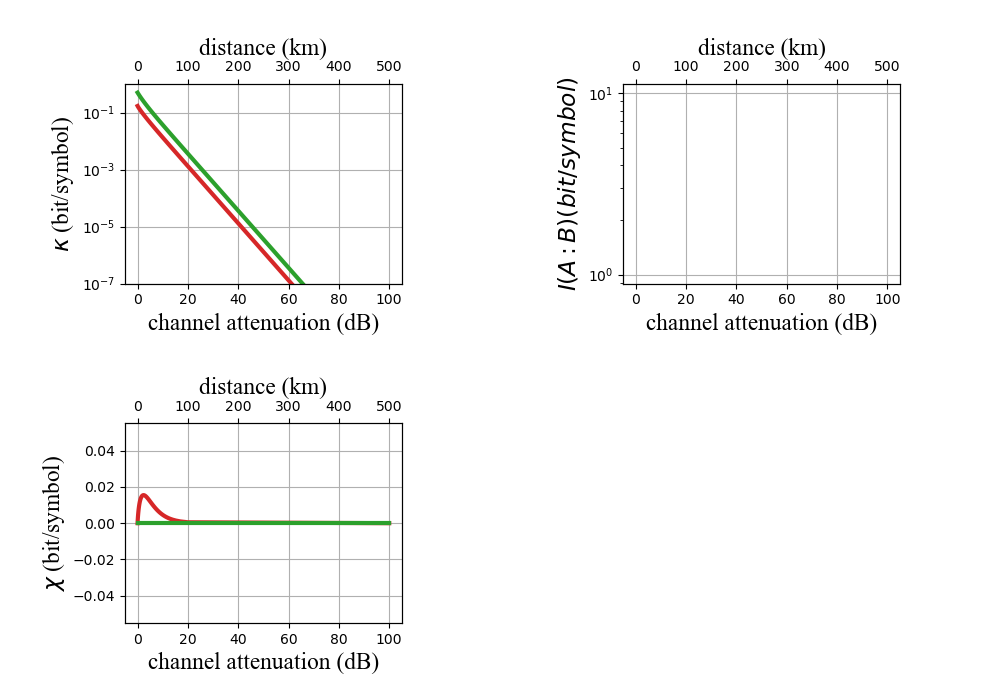

In [5]:
figure = plt.figure(num="QKD system performance VS distance", figsize = default_figure_size)
figure.subplots_adjust(wspace=0.8, hspace=0.7) 
#Secret key fraction plot
axis_secret_key_fraction = figure.add_subplot(2, 2, 1)
axis_secret_key_fraction.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_secret_key_fraction.set_ylabel("$\kappa$ (bit/symbol)", font=axis_font)
axis_distance = axis_secret_key_fraction.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
axis_secret_key_fraction.grid(True)
#Mutual information plot
axis_mutual_information = figure.add_subplot(2, 2, 2)
axis_mutual_information.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_mutual_information.set_ylabel("$I(A:B) (bit/symbol)$", font=axis_font)
axis_mutual_information.grid(True)
axis_distance = axis_mutual_information.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")
#Holevo Information plot
axis_Holevo_information = figure.add_subplot(2, 2, 3)
axis_Holevo_information.set_xlabel("channel attenuation (dB)", font=axis_font)
axis_Holevo_information.set_ylabel("$\chi$ (bit/symbol)", font=axis_font)
axis_Holevo_information.grid(True)
axis_distance = axis_Holevo_information.twiny()
axis_distance.set_xlabel("distance (km)", font=axis_font)
axis_distance.plot(distance, numpy.zeros((len(eta), )), color="None")

#Coherent states protocol
line_secret_key_fraction_coherent_states = \
axis_secret_key_fraction.semilogy(attenuation_dB, numpy.zeros((len(eta), )), color="tab:red", linewidth=3)
line_mutual_information_coherent_states = \
axis_mutual_information.semilogy(attenuation_dB, numpy.zeros((len(eta), )), color="tab:red", linewidth=3)
line_Holevo_information_coherent_states = \
axis_Holevo_information.plot(attenuation_dB, numpy.zeros((len(eta), )), color="tab:red", linewidth=3)
def plot_coherent_states(V_S, channel_thermal_number):
    #V_S = 0.2 #modulation strength
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    variances_A = [1+V_S, 1+V_S]
    correlations_A = [c_S, c_S]
    channel_thermal_numbers = [channel_thermal_number, channel_thermal_number]
    kappa = numpy.zeros((len(eta),))
    I_AB = numpy.zeros((len(eta),))
    chi = numpy.zeros((len(eta),))
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa[j], I_AB[j], chi[j], _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, channel_thermal_numbers)
    label = "coherent states; $V_{q_S} = $%0.2f"%V_S
    line_secret_key_fraction_coherent_states[0].set_ydata(kappa)
    line_mutual_information_coherent_states[0].set_ydata(I_AB)
    line_Holevo_information_coherent_states[0].set_ydata(chi)
#---------------------------------------------------------------------------------------------------
#Squeezed states QKD with squeezed quadrature modulation
line_secret_key_fraction_squeezed_states = \
axis_secret_key_fraction.semilogy(attenuation_dB, numpy.zeros((len(eta), )), color="tab:green", linewidth=3)
line_mutual_information_squeezed_states = \
axis_mutual_information.semilogy(attenuation_dB, numpy.zeros((len(eta), )), color="tab:green", linewidth=3)
line_Holevo_information_squeezed_states = \
axis_Holevo_information.plot(attenuation_dB, numpy.zeros((len(eta), )), color="tab:green", linewidth=3)
def plot_squeezed_states(V_S, V_sqz, channel_thermal_number):
    C_S = V_S #symbols/quadrature covariances
    c_S = C_S/numpy.sqrt(V_S) #correlations (not normalized)
    variances_A = [1/V_sqz, V_sqz+V_S]
    correlations_A = [0, c_S]
    channel_thermal_numbers = [channel_thermal_number, channel_thermal_number]
    kappa = numpy.zeros((len(eta),))
    I_AB = numpy.zeros((len(eta),))
    chi = numpy.zeros((len(eta),))
    for j in range(len(eta)):
        etas = [eta[j], eta[j]]
        kappa[j], I_AB[j], chi[j], _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                     etas, channel_thermal_numbers)
    label = "$p$-squeezed states; $V_{p_S} = $%0.2f"%V_S
    line_secret_key_fraction_squeezed_states[0].set_ydata(kappa)
    line_mutual_information_squeezed_states[0].set_ydata(I_AB)
    line_Holevo_information_squeezed_states[0].set_ydata(chi)
#Set axes limits
axis_secret_key_fraction.set_ylim((1e-7, 1e0))
#Add legends
#axis_secret_key_fraction.legend()
#axis_mutual_information.legend()
#axis_Holevo_information.legend(
def update(V_S, V_sqz, n):
    plot_coherent_states((1-10**(V_sqz/10))/2, n)
    plot_squeezed_states(1-10**(V_sqz/10), 10**(V_sqz/10), n)
    figure.canvas.draw_idle()
    
interact(update, V_S=FloatSlider(min=1e-3, max=20, step=0.001, value=0.35, readout_format='.3f'), \
         V_sqz=FloatSlider(min=-20, max=0, step=0.001, value=-3, readout_format='.3f'),\
        n=FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f'))
plt.show()  

In [8]:
figure.savefig("minimization-of-Holevo-information_VS-loss_example.pdf")

## Secret Key Fraction VS (Loss, $V_{p_S}$)
The following is a 2D plot of the secret key fraction, where the squeezing strength $V_\text{sqz}$ is a parameter, 
while the channel loss $\eta_p = \eta_q$ and the modulation variance for the $p$ quadrature $V_{p_S}$ vary.
The simulation wants to show that complete elimination of information leakage occurs under the condition
\begin{equation}
    V_{p_A} = V_{p_S} + V_\text{sqz} = 1
\end{equation}
Channel additive noise is also a parameter.

interactive(children=(FloatSlider(value=-3.0, description='V_sqz', max=0.0, min=-20.0, readout_format='.3f', s…

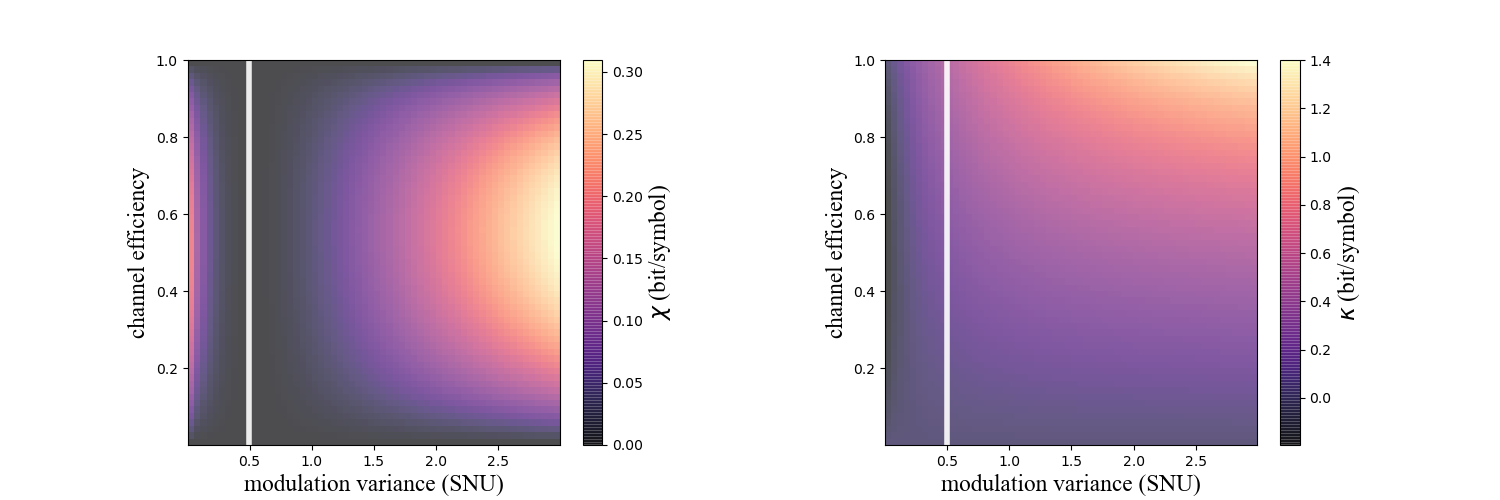

In [11]:
n_points_initial = 60
#Define figure and axes
figure_2D_loss_mod = plt.figure(figsize = (15, 5))
figure_2D_loss_mod.subplots_adjust(wspace=0.5, hspace=0.1) 

#Define plot function
def plot_loss_mod(V_sqz, n_q, n_p, n_points):
    figure_2D_loss_mod.clear()
    #Channel efficiencies
    eta_array = numpy.linspace(10**(-10), 1, n_points)
    #fiber_attenuation_coefficient = 0.2 #[dB/km]
    #attenuation_dB = eta_to_attenuation_dB(eta_array)
    #distance = eta_to_distance(eta_array)
    #V_p_S_array = numpy.linspace((1-V_sqz)*(1-0.9), (1-V_sqz)*(1+0.9), n_points)
    V_p_S_array = numpy.linspace(1e-4, (1-V_sqz)*6, n_points)
    #2D plot variables
    #V_P_S, ATTENUATION = numpy.meshgrid(V_p_S_array, attenuation_dB)
    V_P_S, ETA = numpy.meshgrid(V_p_S_array, eta_array)
    holevo_information = numpy.zeros(V_P_S.shape)
    secret_key_fraction = numpy.zeros(V_P_S.shape)
    #Holevo information axis 
    axis_Holevo_information = figure_2D_loss_mod.add_subplot(1, 2, 1)
    #axis_Holevo_information.set_aspect('equal')
    axis_Holevo_information.set_xlabel("modulation variance (SNU)", font=axis_font)
    axis_Holevo_information.set_ylabel("channel efficiency", font=axis_font)
    #axis_distance = axis_Holevo_information.twinx()
    #axis_distance.set_ylabel("distance (km)", font=axis_font)
    #axis_distance.plot(distance[-1:-n_points], color="None")
    #axis_Holevo_information.grid()
    #Secret key fraction axis
    axis_secret_key_fraction = figure_2D_loss_mod.add_subplot(1, 2, 2)
    #axis_secret_key_fraction.set_aspect('equal')
    axis_secret_key_fraction.set_xlabel("modulation variance (SNU)", font=axis_font)
    axis_secret_key_fraction.set_ylabel("channel efficiency", font=axis_font)
   # axis_distance = axis_secret_key_fraction.twinx()
   # axis_distance.set_ylabel("distance (km)", font=axis_font)
   # axis_distance.plot(distance, color="None")
   # axis_secret_key_fraction.grid()
    for j in range(n_points):
        eta = eta_array[-1-j]
        for k in range(n_points):
            V_p_S = V_p_S_array[k]
            C_p_S = V_p_S #symbols/quadrature covariances
            c_p_S = C_p_S/numpy.sqrt(V_p_S) #correlations (not normalized)
            variances_A = [1/V_sqz, V_sqz+V_p_S]
            correlations_A = [0, c_p_S]
            channel_thermal_numbers = [n_q, n_p]
            etas = [eta, eta]
            kappa, I_AB, chi, _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                         etas, channel_thermal_numbers)
            holevo_information[j, k] = chi
            secret_key_fraction[j, k] = kappa
    #Plot
    min_chi, max_chi = (numpy.min(holevo_information), numpy.max(holevo_information))
    imshow_chi = axis_Holevo_information.imshow(holevo_information.astype(float), alpha=0.7, cmap=cm.magma, aspect='auto',\
                                                norm=matplotlib.colors.Normalize(vmin=0, vmax=max_chi),\
                                               extent=[V_p_S_array[0], V_p_S_array[-1], eta_array[0], eta_array[-1]])
    colorbar_chi = figure_2D_loss_mod.colorbar(mappable=imshow_chi, ax=axis_Holevo_information)
    colorbar_chi.set_label("$\chi$ (bit/symbol)", font=axis_font)
   
    min_kappa, max_kappa = (numpy.min(secret_key_fraction), numpy.max(secret_key_fraction))
    imshow_kappa = axis_secret_key_fraction.imshow(secret_key_fraction.astype(float), alpha=0.7, cmap=cm.magma, aspect='auto',\
                                                    norm=matplotlib.colors.Normalize(vmin=min_kappa, vmax=max_kappa),\
                                                    extent=[V_p_S_array[0], V_p_S_array[-1], eta_array[0], eta_array[-1]])
    colorbar_kappa = figure_2D_loss_mod.colorbar(mappable=imshow_kappa, ax=axis_secret_key_fraction)
    colorbar_kappa.set_label("$\kappa$ (bit/symbol)", font=axis_font)
    #Plot the minimization axis
    axis_Holevo_information.plot([1-V_sqz, 1-V_sqz], [numpy.min(ETA), numpy.max(ETA)], color="white", alpha=0.9, linewidth=4)
    axis_secret_key_fraction.plot([1-V_sqz, 1-V_sqz], [numpy.min(ETA), numpy.max(ETA)], color="white", alpha=0.9, linewidth=4)
    #Limit the axes
    axis_secret_key_fraction.set_xlim((V_p_S_array[0], V_p_S_array[-1]))
    axis_Holevo_information.set_xlim((V_p_S_array[0], V_p_S_array[-1]))
#Interactive plot functions
def update_loss_mod(V_sqz, n_q, n_p, n_points):
    plot_loss_mod(V_sqz=10**(V_sqz/10), n_q=n_q, n_p=n_p, n_points=n_points)
    figure_2D_loss_mod.canvas.draw_idle()
    
interact(update_loss_mod, V_sqz=FloatSlider(min=-20, max=0, step=0.001, value=-3, readout_format='.3f'),\
        n_q=FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f'),\
        n_p=FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f'),\
        n_points = IntSlider(min=5, max=100, step=1, value=n_points_initial, readout_format='d'))
plt.show()

In [13]:
figure_2D_loss_mod.savefig("minimization-of-Holevo-information_VS-modulation-variance-efficiency_V_sqz=0.5_n_q=n_p=0.01.pdf")

## Secret Key Fraction VS ($V_\text{sqz}$, $V_{p_S}$) 
Similar plot, where $\eta_q = \eta_p$ is a parameter, while $V_\text{sqz}$ and $V_{p_S}$ vary.
Channel additive noise is also a parameter.

interactive(children=(FloatSlider(value=1.0, description='eta', max=1.0, min=1e-06, readout_format='.3f', step…

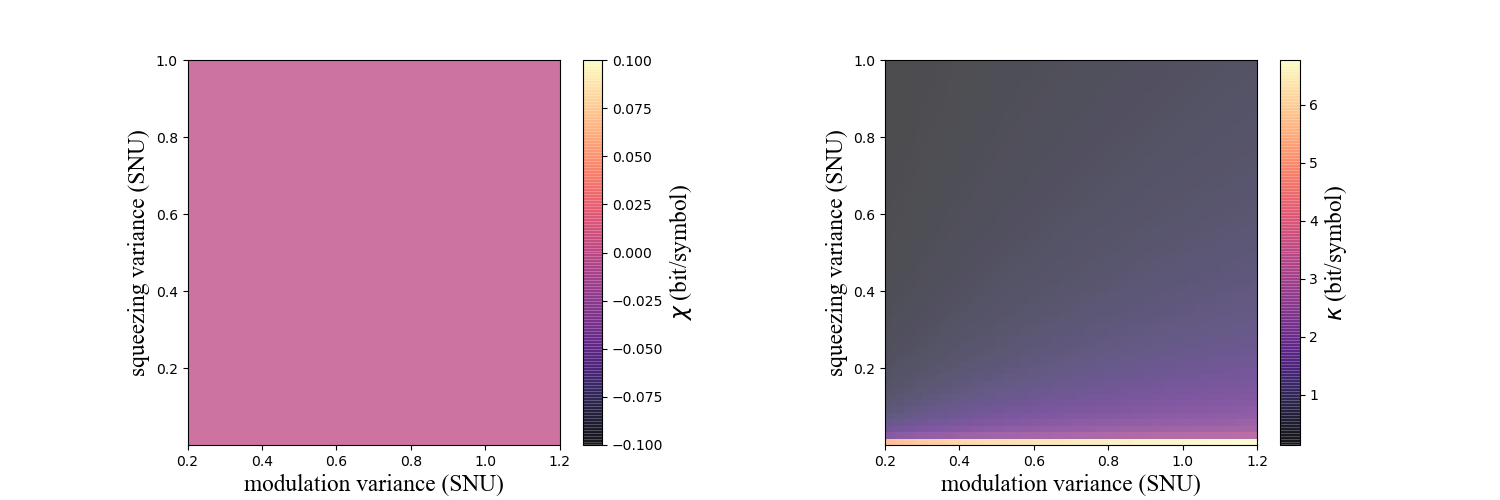

In [10]:
n_points_initial = 60
#Define figure and axes
figure_2D_sqz_mod = plt.figure(figsize = (15, 5))
figure_2D_sqz_mod.subplots_adjust(wspace=0.5, hspace=0.1) 

#Define plot function
def plot_sqz_mod(eta, n_q, n_p, n_points):
    figure_2D_sqz_mod.clear()
    V_sqz_array = numpy.linspace(1e-4, 1, n_points)
    V_p_S_array = numpy.linspace(0.2, 1.2,n_points)
    #2D plot variables
    V_P_S ,V_SQZ = numpy.meshgrid(V_p_S_array, V_sqz_array)
    holevo_information = numpy.zeros(V_P_S.shape)
    secret_key_fraction = numpy.zeros(V_P_S.shape)
    #Holevo information axis 
    axis_Holevo_information = figure_2D_sqz_mod.add_subplot(1, 2, 1)
    axis_Holevo_information.set_xlabel("modulation variance (SNU)", font=axis_font)
    axis_Holevo_information.set_ylabel("squeezing variance (SNU)", font=axis_font)
    #axis_Holevo_information.grid()
    #Secret key fraction axis
    axis_secret_key_fraction = figure_2D_sqz_mod.add_subplot(1, 2, 2)
    axis_secret_key_fraction.set_xlabel("modulation variance (SNU)", font=axis_font)
    axis_secret_key_fraction.set_ylabel("squeezing variance (SNU)", font=axis_font)
   # axis_secret_key_fraction.grid()
    for j in range(n_points):
        V_sqz = V_sqz_array[-1-j]
        for k in range(n_points):
            V_p_S = V_p_S_array[k]
            C_p_S = V_p_S #symbols/quadrature covariances
            c_p_S = C_p_S/numpy.sqrt(V_p_S) #correlations (not normalized)
            variances_A = [1/V_sqz, V_sqz+V_p_S]
            correlations_A = [0, c_p_S]
            channel_thermal_numbers = [n_q, n_p]
            etas = [eta, eta]
            kappa, I_AB, chi, _ = secret_key_fraction_Gaussian_CVQKD(variances_A, correlations_A,\
                                                                         etas, channel_thermal_numbers)
            holevo_information[j, k] = chi
            secret_key_fraction[j, k] = kappa
    #Plot
    min_chi, max_chi = (numpy.min(holevo_information), numpy.max(holevo_information))
    imshow_chi = axis_Holevo_information.imshow(holevo_information, alpha=0.7, cmap=cm.magma, \
                                                norm=matplotlib.colors.Normalize(vmin=0, vmax=max_chi), aspect='auto', \
                                                extent=[V_p_S_array[0], V_p_S_array[-1], V_sqz_array[0], V_sqz_array[-1]])
    colorbar_chi = figure_2D_sqz_mod.colorbar(mappable=imshow_chi, ax=axis_Holevo_information)
    colorbar_chi.set_label("$\chi$ (bit/symbol)", font=axis_font)
    
    min_kappa, max_kappa = (numpy.min(secret_key_fraction), numpy.max(secret_key_fraction))
    imshow_kappa = axis_secret_key_fraction.imshow(secret_key_fraction.astype(float), alpha=0.7, cmap=cm.magma, \
                                                   norm=matplotlib.colors.Normalize(vmin=min_kappa, vmax=max_kappa), aspect='auto',\
                                                   extent=[V_p_S_array[0], V_p_S_array[-1], V_sqz_array[0], V_sqz_array[-1]])
    colorbar_kappa = figure_2D_sqz_mod.colorbar(mappable=imshow_kappa, ax=axis_secret_key_fraction)
    colorbar_kappa.set_label("$\kappa$ (bit/symbol)", font=axis_font)
#Interactive plot functions
def update_sqz_mod(eta, n_q, n_p, n_points):
    plot_sqz_mod(eta=eta, n_q=n_q, n_p=n_p, n_points=n_points)
    figure_2D_sqz_mod.canvas.draw_idle()
    
interact(update_sqz_mod, eta=FloatSlider(min=1e-6, max=1, step=0.001, value=1, readout_format='.3f'),\
        n_q=FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f'),\
        n_p=FloatSlider(min=0, max=0.2, step=0.001, value=0, readout_format='.3f'),\
        n_points = IntSlider(min=5, max=100, step=1, value=n_points_initial, readout_format='d'))
plt.show()

In [16]:
figure_2D_sqz_mod.savefig("minimization-of-Holevo-information_VS-modulation-variance-squeezing-variance_eta_q=eta_p=0.8_n_q=n_p=0.020.pdf")